# Imports

In [1]:
import numpy as np
from utils import splus_conn

# Download Data

In [2]:
conn = splus_conn()

Login: welberth
Password: ········
You have access to internal data


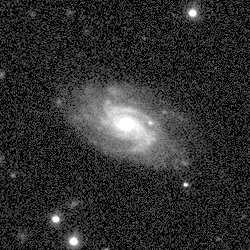

In [4]:
RA,DEC = [37.8590, 1.3464]
Size = 250
Band = "R"
hsb = conn.get_band_img(RA, DEC, Size, Band)
hsb

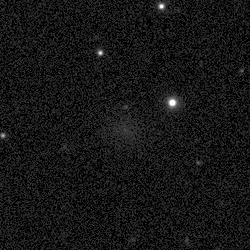

In [117]:
RA,DEC = [51.84006667,-36.14566667]#very noisy[51.975,-37.37583333]#noisy[51.89583333,-37.50472222]#[51.84006667,-36.14666667]
Size = 250
Band = "R"
lsb = conn.get_band_img(RA, DEC, Size, Band)
lsb

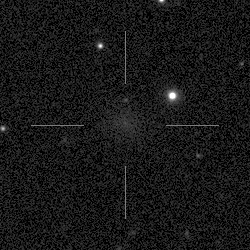

In [118]:
from PIL import Image, ImageDraw, ImageOps
hdu2 = hdu.copy()
draw = ImageDraw.Draw(hdu2)
size = hdu2.size[1]
center = size/2
edge_pad = center/4
center_pad = center/3
fill = 125

draw.line((edge_pad, center, center-center_pad, center), fill=fill)
draw.line((center, edge_pad, center, center-center_pad), fill=fill)
draw.line((center+center_pad, center, size-edge_pad, center), fill=fill)
draw.line((center, center+center_pad, center, size-edge_pad), fill=fill)
lsb2=hdu2.copy()
lsb2

In [119]:
imgs_comb = np.hstack([ImageOps.expand(hsb, border=15,fill=255),ImageOps.expand(lsb, border=15,fill=255)])

# save that beautiful picture
imgs_comb = Image.fromarray(imgs_comb )
imgs_comb.save('/home/welberth/Dissertation/modelo-latex/figuras/hsb_vs_lsb.pdf' )    

In [5]:
import pandas as pd
from tqdm import tqdm
coords = pd.read_csv("data/LSBs_coordinates/DES_cnn.csv")[["ra","dec"]]

In [6]:
in_splus = [[221.12264884517305, 5.176501691877992],
 [217.31264841939893, 5.985447638454117],
 [222.0508484016592, 5.803362060504273],
 [223.1811635517, 4.604740283078384],
 [223.63001408463936, 4.93762013546224],
 [220.30941143460308, 6.201573739272893]]

for RA,DEC in tqdm(coords.values):
    try:
        Size = 1
        Band = "R"
        hsb = conn.get_band_img(RA, DEC, Size, Band)
        in_splus.append([RA,DEC])
    except:
        continue

 71%|███████████████████████▍         | 14187/19996 [3:28:25<2:40:20,  1.66s/it]

In [14]:
len(in_splus)

3483

In [32]:
df_splus[["RA","DEC"]].reset_index().to_csv("LSBG_splus.csv")

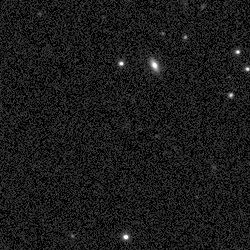

In [20]:
RA,DEC =61.386376,-58.16335
Size = 250
Band = "R"
hsb = conn.get_band_img(RA, DEC, Size, Band)
hsb